[5.2 2.6]
[[ 0.5 -0.5  2.5  0.5  3.5]
 [-0.5  0.5 -2.5 -0.5 -3.5]
 [ 2.5 -2.5 12.5  2.5 17.5]
 [ 0.5 -0.5  2.5  0.5  3.5]
 [ 3.5 -3.5 17.5  3.5 24.5]]
[[8.2 1.6]
 [1.6 5.8]]
[9. 5.]
[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]
[[-3.2 -1.6]
 [-2.2  1.4]
 [-0.2 -2.6]
 [ 1.8  3.4]
 [ 3.8 -0.6]]
[[-3.578 -0.   ]
 [-1.342  2.236]
 [-1.342 -2.236]
 [ 3.13   2.236]
 [ 3.13  -2.236]]


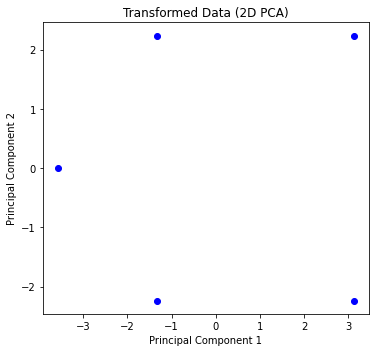

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])
mean = np.mean(data, axis=0)
print(mean)
matrix=np.cov(data)
print(matrix)
cov_matrix = np.cov(data, rowvar=False)
print(cov_matrix)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)
print(eigenvectors)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
top_eigenvectors = eigenvectors[:, :2]
transformed_data = np.dot(data - mean, top_eigenvectors)
print(data-mean)
print(np.around(transformed_data,decimals=3))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color='blue')
plt.title('Transformed Data (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

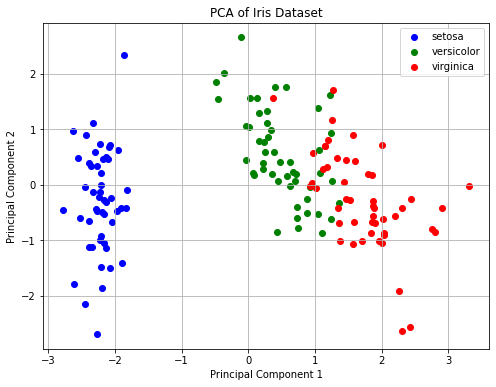

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
cov_matrix = np.cov(X_std, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
top_eigenvectors = eigenvectors[:, :2]
transformed_data = np.dot(X_std, top_eigenvectors)
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']

for target, color in zip(np.unique(y), colors):
    indices = np.where(y == target)
    plt.scatter(transformed_data[indices, 0], transformed_data[indices, 1], c=color, label=iris.target_names[target])

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
